# Notebook 02: Create Patches Dataset

**Mục đích:** Trích xuất patches 64×64 từ tất cả ground truth points.

**Input:**
- Sentinel-2 imagery (7 bands × 2 time periods)
- Sentinel-1 imagery (2 bands × 2 time periods)
- Ground truth points CSV (1,285 points)
- Forest boundary shapefile

**Output:**
- `data/patches/patches_64x64.pkl` (~380 MB)
- Chứa 1,285 patches với shape (18, 64, 64)

**Thời gian ước tính:** ~5-10 phút

In [1]:
# Import libraries
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from src.preprocessing import create_patches_dataset
from src.config import PATCHES_DIR, PATCH_SIZE

## 1. Kiểm tra dữ liệu đầu vào

In [2]:
from src.config import (
    GROUND_TRUTH_CSV, SENTINEL1_2024, SENTINEL1_2025,
    SENTINEL2_2024, SENTINEL2_2025, FOREST_BOUNDARY
)

print("Kiểm tra các file dữ liệu...\n")

files_to_check = {
    "Ground Truth CSV": GROUND_TRUTH_CSV,
    "Sentinel-2 2024": SENTINEL2_2024,
    "Sentinel-2 2025": SENTINEL2_2025,
    "Sentinel-1 2024": SENTINEL1_2024,
    "Sentinel-1 2025": SENTINEL1_2025,
    "Forest Boundary": FOREST_BOUNDARY
}

all_exist = True
for name, path in files_to_check.items():
    exists = path.exists()
    status = "✓" if exists else "✗"
    print(f"{status} {name}: {path}")
    if not exists:
        all_exist = False

if all_exist:
    print("\n✓ Tất cả files đều tồn tại!")
else:
    print("\n✗ Một số files không tồn tại. Vui lòng kiểm tra lại đường dẫn.")

Kiểm tra các file dữ liệu...

✓ Ground Truth CSV: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\raw\ground_truth\Training_Points_CSV.csv
✓ Sentinel-2 2024: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\raw\sentinel-2\S2_2024_01_30.tif
✓ Sentinel-2 2025: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\raw\sentinel-2\S2_2025_02_28.tif
✓ Sentinel-1 2024: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\raw\sentinel-1\S1_2024_02_04_matched_S2_2024_01_30.tif
✓ Sentinel-1 2025: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\raw\sentinel-1\S1_2025_02_22_matched_S2_2025_02_28.tif
✓ Forest Boundary: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\raw\boundary\forest_boundary.shp

✓ Tất cả files đều tồn tại!


## 2. Tạo patches dataset

Hàm `create_patches_dataset()` sẽ:
1. Load tất cả imagery (S1, S2)
2. Apply forest boundary mask
3. Normalize values
4. Extract patches 64×64 tại mỗi ground truth point
5. Stack thành 18 channels: [S2_2024, S1_2024, S2_2025, S1_2025]
6. Reject patches có NaN hoặc all-zero
7. Save to pickle file

In [3]:
# Tạo patches
patches, labels = create_patches_dataset(
    patch_size=PATCH_SIZE,
    output_dir=PATCHES_DIR,
    normalize=True
)

Loaded 1285 ground truth points
  - No deforestation (0): 650
  - Deforestation (1): 635
Loading Sentinel-2 imagery...
Loading Sentinel-1 imagery...
S2_2024 shape: (7, 10917, 12547)
S2_2025 shape: (7, 10917, 12547)
S1_2024 shape: (2, 10917, 12547)
S1_2025 shape: (2, 10917, 12547)

Applying forest boundary mask...


c:\tools\Anaconda3\envs\dang\Lib\site-packages\rasterio\features.py:336: ShapeSkipWarning: Invalid or empty shape None at index 12 will not be rasterized.
  warnings.warn(
c:\tools\Anaconda3\envs\dang\Lib\site-packages\rasterio\features.py:336: ShapeSkipWarning: Invalid or empty shape None at index 54 will not be rasterized.
  warnings.warn(
c:\tools\Anaconda3\envs\dang\Lib\site-packages\rasterio\features.py:336: ShapeSkipWarning: Invalid or empty shape None at index 83 will not be rasterized.
  warnings.warn(
c:\tools\Anaconda3\envs\dang\Lib\site-packages\rasterio\features.py:336: ShapeSkipWarning: Invalid or empty shape None at index 97 will not be rasterized.
  warnings.warn(
c:\tools\Anaconda3\envs\dang\Lib\site-packages\rasterio\features.py:336: ShapeSkipWarning: Invalid or empty shape None at index 12 will not be rasterized.
  warnings.warn(
c:\tools\Anaconda3\envs\dang\Lib\site-packages\rasterio\features.py:336: ShapeSkipWarning: Invalid or empty shape None at index 54 will not 

Boundary mask applied - Valid pixels: 17,016,424 / 136,975,599 (12.42%)
Validating and normalizing imagery...
Extracting 64x64 patches...


100%|██████████| 1285/1285 [00:01<00:00, 1096.80it/s]



Extracted 1280 valid patches out of 1285 points
  - No deforestation (0): 645
  - Deforestation (1): 635
Patches shape: (1280, 18, 64, 64)
Patches saved to d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\patches\patches_64x64.pkl


## 3. Verify patches đã tạo

In [4]:
print("\n" + "="*70)
print("PATCHES DATASET SUMMARY")
print("="*70)

print(f"\nPatches shape: {patches.shape}")
print(f"  - Number of samples: {patches.shape[0]}")
print(f"  - Channels: {patches.shape[1]}")
print(f"  - Height × Width: {patches.shape[2]} × {patches.shape[3]}")

print(f"\nLabels shape: {labels.shape}")
print(f"  - No deforestation (0): {(labels == 0).sum()} ({(labels == 0).sum() / len(labels) * 100:.1f}%)")
print(f"  - Deforestation (1): {(labels == 1).sum()} ({(labels == 1).sum() / len(labels) * 100:.1f}%)")

print(f"\nValue ranges:")
print(f"  - Min: {patches.min():.4f}")
print(f"  - Max: {patches.max():.4f}")
print(f"  - Mean: {patches.mean():.4f}")
print(f"  - Std: {patches.std():.4f}")

# Check for NaN or Inf
has_nan = np.isnan(patches).any()
has_inf = np.isinf(patches).any()
print(f"\nData quality:")
print(f"  - Contains NaN: {has_nan}")
print(f"  - Contains Inf: {has_inf}")


PATCHES DATASET SUMMARY

Patches shape: (1280, 18, 64, 64)
  - Number of samples: 1280
  - Channels: 18
  - Height × Width: 64 × 64

Labels shape: (1280,)
  - No deforestation (0): 645 (50.4%)
  - Deforestation (1): 635 (49.6%)

Value ranges:
  - Min: -1.0000
  - Max: 1.0000
  - Mean: 0.3371
  - Std: 0.2829

Data quality:
  - Contains NaN: False
  - Contains Inf: False


## 4. Visualize mẫu patches

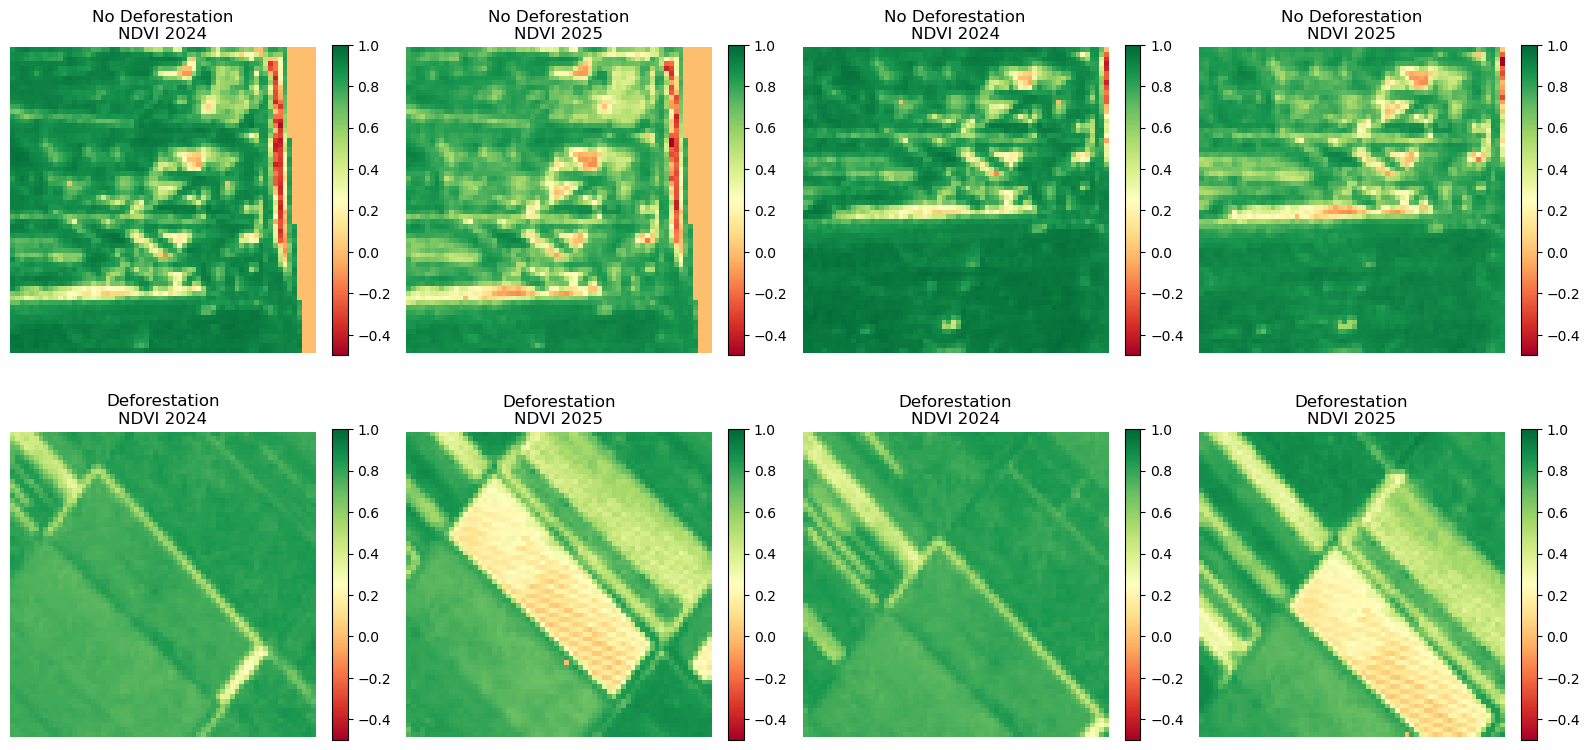


✓ Sample patches visualization saved to figures/sample_patches.png


In [5]:
# Visualize 4 random patches (2 no-deforestation, 2 deforestation)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Get indices
idx_0 = np.where(labels == 0)[0][:2]  # 2 samples label 0
idx_1 = np.where(labels == 1)[0][:2]  # 2 samples label 1

# Channel 4 = NDVI 2024, Channel 13 = NDVI 2025
channel_names = ['NDVI 2024', 'NDVI 2025']
channels = [4, 13]  # NDVI channels

for row, (idx_list, label_name) in enumerate([(idx_0, 'No Deforestation'), (idx_1, 'Deforestation')]):
    for col in range(2):
        idx = idx_list[col]
        
        # Plot NDVI 2024
        ax = axes[row, col*2]
        im = ax.imshow(patches[idx, channels[0]], cmap='RdYlGn', vmin=-0.5, vmax=1)
        ax.set_title(f"{label_name}\n{channel_names[0]}")
        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046)
        
        # Plot NDVI 2025
        ax = axes[row, col*2+1]
        im = ax.imshow(patches[idx, channels[1]], cmap='RdYlGn', vmin=-0.5, vmax=1)
        ax.set_title(f"{label_name}\n{channel_names[1]}")
        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046)

plt.tight_layout()
plt.savefig('../figures/sample_patches.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Sample patches visualization saved to figures/sample_patches.png")

## 5. Kết luận

✅ **Patches dataset đã được tạo thành công!**

**File output:** `data/patches/patches_64x64.pkl`

**Tiếp theo:** Chạy notebook 03 để train Random Forest hoặc notebook 04 để train Simple CNN.